In [1]:
import pandas as pd

In [6]:
data=pd.read_csv(r'data\finalcreditcard.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
data.shape

(30000, 25)

In [10]:
df=data

In [11]:
df.shape

(30000, 25)

In [18]:
df.shape

(30000, 25)

In [35]:
df=df.drop('ID',axis=1)

In [36]:
corr=df.corr()

In [22]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

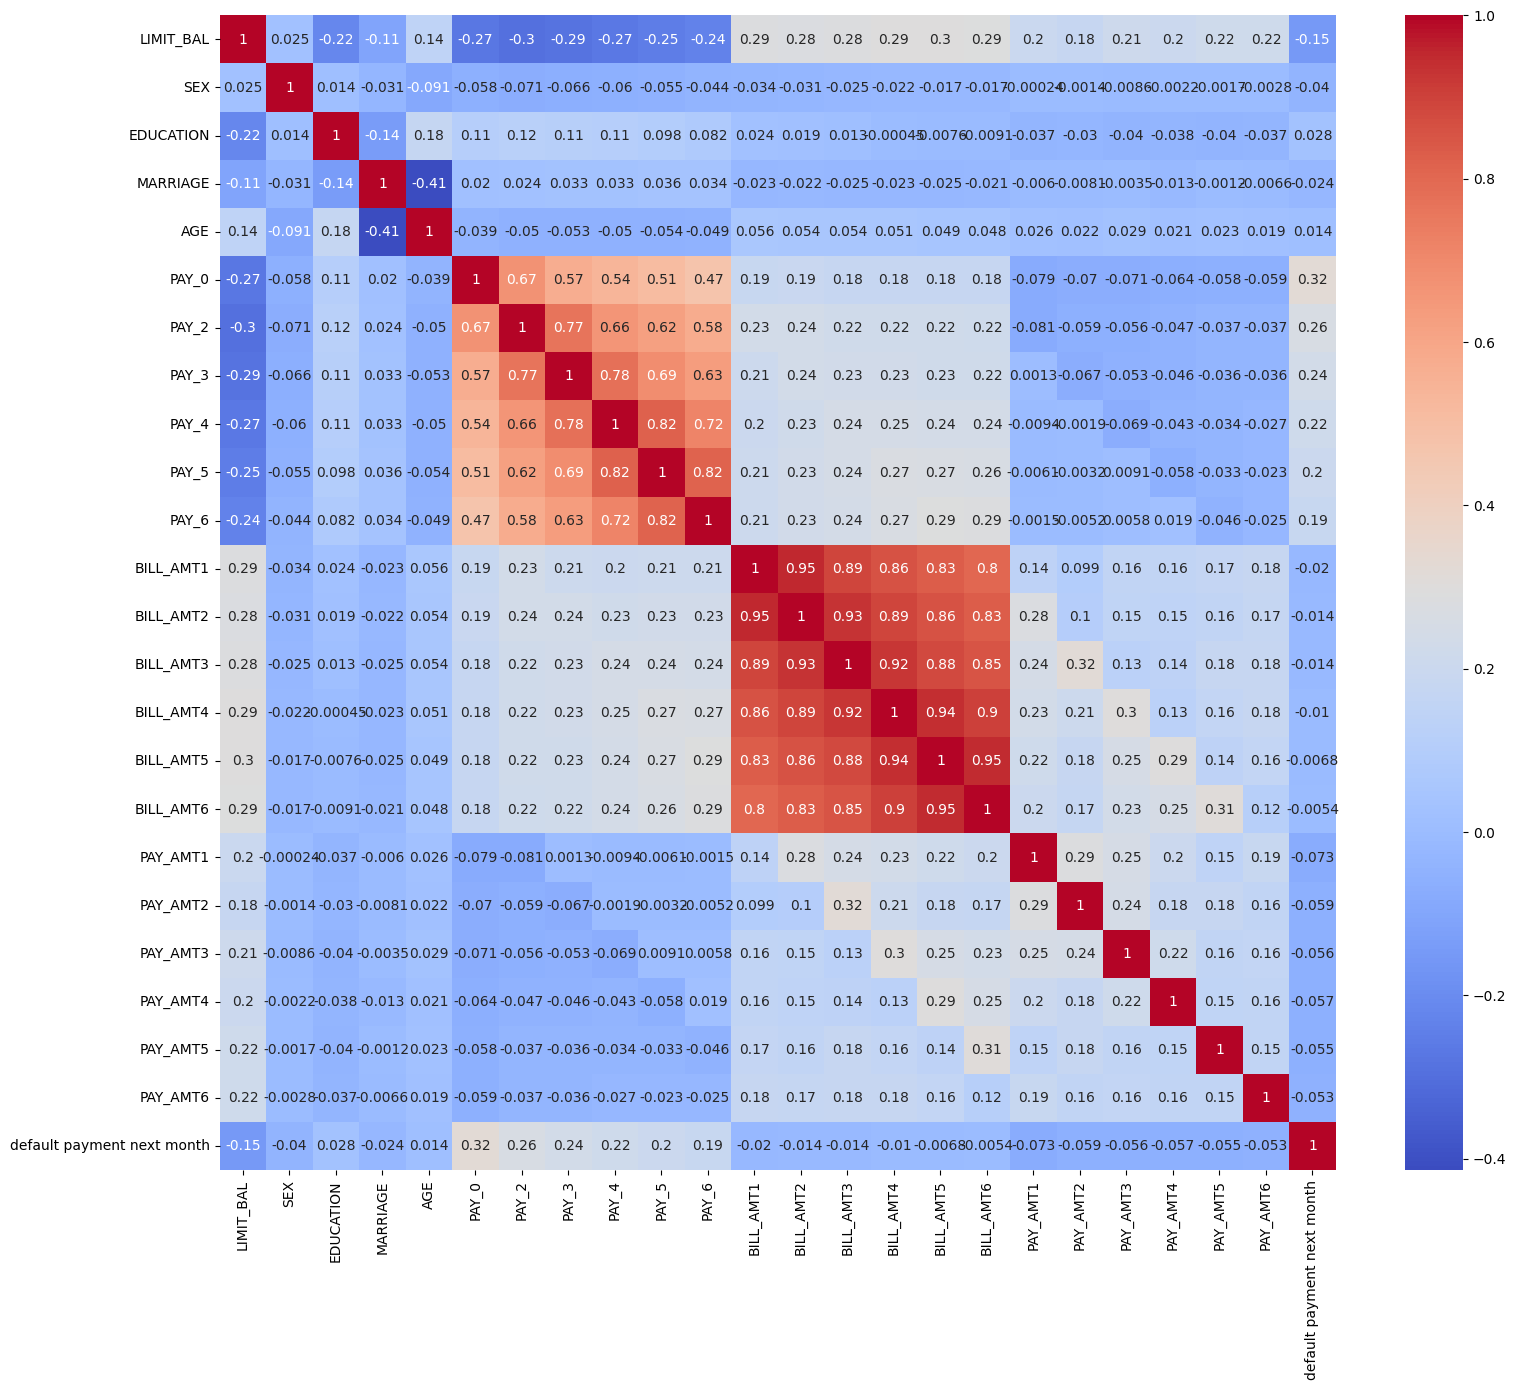

In [37]:
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [14]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [15]:
cat_cols=['MARRIAGE','EDUCATION']

In [16]:
num_cols=['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [17]:
num_cols


['LIMIT_BAL',
 'SEX',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [18]:
X=df.drop('default payment next month',axis=1)
y=df['default payment next month']

In [19]:
X.shape

(30000, 24)

In [43]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [20]:
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('onehotencoder',OneHotEncoder(sparse=False)),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,num_cols),
('cat_pipeline',cat_pipeline,cat_cols)
])

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [22]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

g:\Project\Creditcard\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [25]:
lm.score(X_train,y_train)

0.811

In [26]:
y_pred=lm.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.8141111111111111